Progetto di Applicazioni Programmazione e Data Intensive

Lototskyy Zakhar

Lo scopo del progetto è quello di predire la qualità del vino basandosi sui test psicochimici 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


file_name = "wine+quality.zip"
file_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
if not os.path.exists(file_name):
    urlretrieve(file_url, file_name)
    with ZipFile(file_name) as file:
        file.extractall()

In [2]:
data = pd.read_csv("winequality-white.csv", sep=";")

`fixed acidity`: acidità fissa  
`volatile acidity`: acidità volatile  
`citric acid`: acido citrico  
`residual sugar`: residuo zuccherino  
`chlorides`: cloruri  
`free sulfur dioxide`: biossido di zolfo libero  
`total sulfur dioxide`: biossido di zolfo totale  
`density`: densità del vino  
`pH`: acidità/basicità del vino  
`sulphates`: solfati  
`alcohol`: percentuale di alcol  
`quality`: qualità del vino  
Escludendo densità, pH e qualità il resto rappresenta la quantità della sostanza.

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


(<Axes: >,
 6    2198
 5    1457
 7     880
 8     175
 4     163
 3      20
 9       5
 Name: quality, dtype: int64)

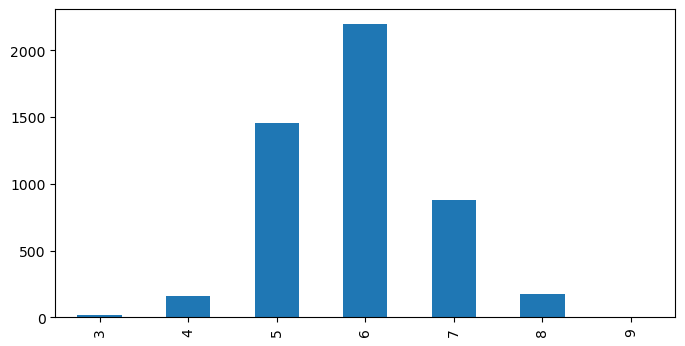

In [4]:
plt.figure(figsize=(8,4))
data["quality"].value_counts().sort_index().plot.bar(), \
data["quality"].value_counts()

La qualità è concentrata principalmente attorno 6.  
Esistono pochi record contenenti la qualità di 3 e 9, verranno quindi eliminati dal dataset.

In [5]:
data.drop(data[data["quality"] == 9].index, axis=0, inplace=True)
data.drop(data[data["quality"] == 3].index, axis=0, inplace=True)

<Axes: ylabel='Frequency'>

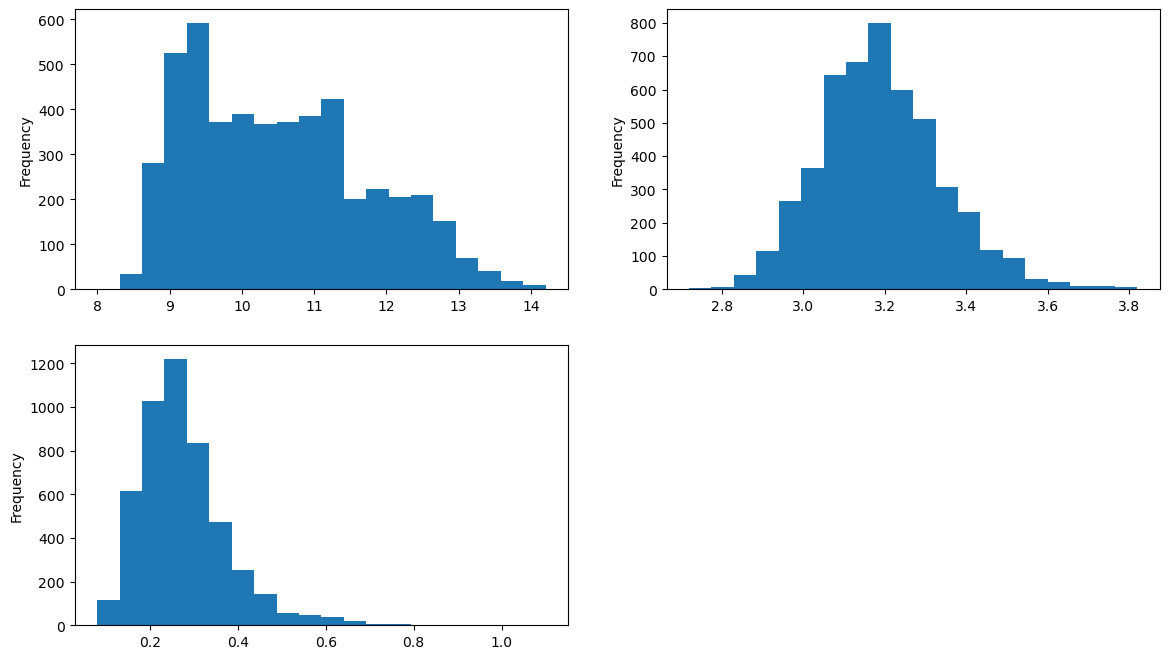

In [6]:
plt.figure(figsize=(14,8))
data["alcohol"].plot.hist(bins=20, ax=plt.subplot(2, 2, 1))
data["pH"].plot.hist(bins=20, ax=plt.subplot(2, 2, 2))
data["volatile acidity"].plot.hist(bins=20, ax=plt.subplot(2, 2, 3))

L'alcol ha una distruzione tendenzialmente verso sinistra con valori tra 8,5 e 14.  
Il pH ha una normale distribuzione tra 2,8 e 3,6 con un picco a 3,2.  
L'acidità volatile ha una normale distribuzione con qualche outsider oltre 0,7.  

In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.026443,0.290072,0.088139,0.021500,-0.047597,0.093317,0.264645,-0.423859,-0.015909,-0.121874,-0.108500
volatile acidity,-0.026443,1.000000,-0.150979,0.064683,0.064511,-0.101634,0.086097,0.025885,-0.030630,-0.037471,0.068431,-0.194541
citric acid,0.290072,-0.150979,1.000000,0.094917,0.114533,0.103770,0.126230,0.150472,-0.163871,0.063242,-0.077185,-0.010867
residual sugar,0.088139,0.064683,0.094917,1.000000,0.086752,0.313354,0.405490,0.839600,-0.192379,-0.028357,-0.451961,-0.099011
chlorides,0.021500,0.064511,0.114533,0.086752,1.000000,0.105537,0.196715,0.255668,-0.086617,0.012031,-0.360366,-0.209607
free sulfur dioxide,-0.047597,-0.101634,0.103770,0.313354,0.105537,1.000000,0.610846,0.306361,-0.007356,0.057667,-0.258718,0.024183
total sulfur dioxide,0.093317,0.086097,0.126230,0.405490,0.196715,0.610846,1.000000,0.534253,0.001717,0.131604,-0.453861,-0.169875
density,0.264645,0.025885,0.150472,0.839600,0.255668,0.306361,0.534253,1.000000,-0.090886,0.072821,-0.780472,-0.309837
pH,-0.423859,-0.030630,-0.163871,-0.192379,-0.086617,-0.007356,0.001717,-0.090886,1.000000,0.157146,0.120173,0.099749
sulphates,-0.015909,-0.037471,0.063242,-0.028357,0.012031,0.057667,0.131604,0.072821,0.157146,1.000000,-0.015963,0.054308


Da questa tabella possiamo vedere che la qualità è influenzata positivamente dalla quantità di alcol presente e influenzata
negativemente dalla densità del vino.

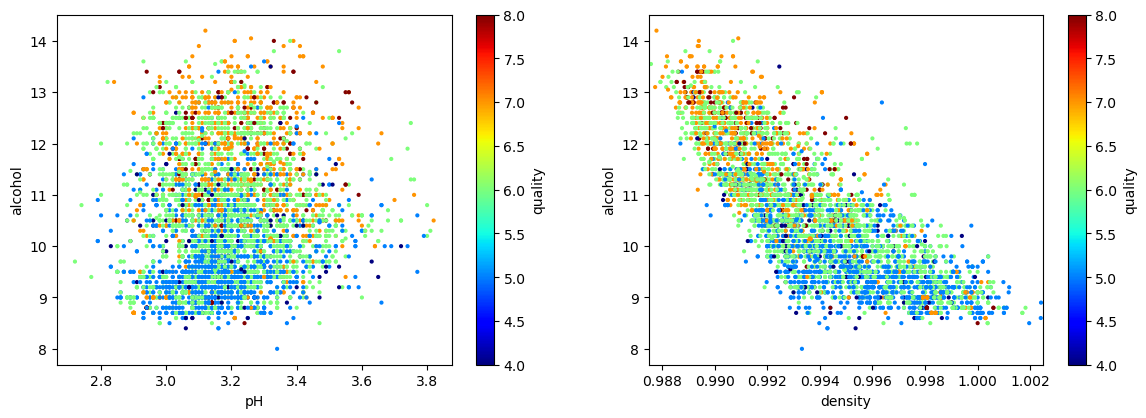

In [8]:
plt.figure(figsize=(14,10))
data.plot.scatter("pH", "alcohol", c="quality", s=4, colormap="jet", ax=plt.subplot(2, 2, 1));
data.plot.scatter("density", "alcohol", c="quality", s=4, colormap="jet", xlim=(0.9875, 1.0025), ax=plt.subplot(2, 2, 2));

Si può osservare:
- la qualità del vino aumenta all'aumentare del contenuto alcolico  
- la qualità aumenta quando la densità del vino cala con un contenuto alcolico superiore a 10

Un'altra osservazione che si può fare sui grafici è che la qualità 6 è molto sparsa su di essi e questo comporterà una
riduzione nella precizione dei modelli.

In [9]:
# split dei dati di training e testing
from sklearn.model_selection import train_test_split
y_data = data["quality"]
X_data = data.drop(columns="quality")
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=1/3, random_state=42)

In [10]:
# importazione di modelli e tools per la loro gestione

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

kf = KFold(3, shuffle=True, random_state=42)
models = {}
# models["Perceptron"] = {"Model": per_model, "Score": score}

In [11]:
#      LOGISTIC REGRESSION
grid = [
    {
        "scaler": [None, StandardScaler()],
        "lr__C": np.logspace(-3, 3, 7),
        "lr__penalty": ["l1", "l2"]
    }, {
        "scaler": [None, StandardScaler()],
        "lr__C": np.logspace(-3, 3, 7),
        "lr__penalty": ["elasticnet"],
        "lr__l1_ratio": [0.2, 0.3, 0.4, 0.5]
    }
]
model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga", multi_class="multinomial", random_state=42))
])
gs = GridSearchCV(model, grid, cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)
models["logistic regressor"] = {"score": gs.score(X_val, y_val)}

C:\Users\zzzzzz\anaconda3_64\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
#      DECISION TREE CLASSIFIER
grid = {
    "scaler": [None, StandardScaler()],
    "dtc__max_depth": [None] + [i for i in range(2, 10)],
    "dtc__min_samples_split": range(1, 5),
    "dtc__min_samples_leaf": range(1, 5),
    "dtc__max_features": range(1, len(X_train.columns) + 1)
}
model = Pipeline([
    ("scaler", None),
    ("dtc", DecisionTreeClassifier(random_state=42))
])
gs = GridSearchCV(model, grid, cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)
models["decision tree classifier"] = {"score": gs.score(X_val, y_val)}

In [13]:
#      RANDOM FOREST CLASSIFIER
grid = {
    "scaler": [None, StandardScaler()],
    "rfc__max_samples": [None, 0.2],
    "rfc__n_estimators": range(50, 301, 50),
    "rfc__max_depth": [None] + [i for i in range(2, 10)]
}

model = Pipeline([
    ("scaler", None),
    ("rfc", RandomForestClassifier(random_state=42))
])
gs = GridSearchCV(model, grid, cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)
models["randon forest classifier"] = {"score": gs.score(X_val, y_val)}

In [14]:
#      MULTI LAYER PERCEPTRON CLASSIFIER
grid = {
    "scaler": [None, StandardScaler()],
    "mlpc__hidden_layer_sizes": [16, (8, 8), (16, 8)],
    "mlpc__batch_size": [100, 200, 300],
    "mlpc__learning_rate_init": [0.001, 0.01],
    "mlpc__alpha": [0.01, 0.1]
}
model = Pipeline([
    ("scaler", None),
    ("mlpc", MLPClassifier(random_state=42))
])
gs = GridSearchCV(model, grid, cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)
models["mlp classifier"] = {"score": gs.score(X_val, y_val)}

In [15]:
for model, score in models.items():
    print(model +": {}".format(score["score"]))

logistic regressor: 0.5255384615384615
decision tree classifier: 0.564923076923077
randon forest classifier: 0.660923076923077
mlp classifier: 0.5483076923076923
